In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from operator import truediv

In [3]:
def preprocess_csv(file_path):
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(file_path)
    
    # Handling missing values
    # Replace any missing values (NaN) with appropriate strategies
    # For numerical columns, you can use methods like mean, median, or interpolation
    df.fillna(df.mean(), inplace=True)  # Example: Replace missing values with column means
    
    # For categorical columns, you can use methods like mode or a constant value
    df.fillna('Unknown', inplace=True)  # Example: Replace missing values with 'Unknown'
    
    # Process or remodel the description columns
    # Depending on your specific use case, you can apply techniques like text preprocessing, feature extraction, or encoding
    
    # Text preprocessing: Remove special characters, convert to lowercase, etc.
    #df['description'] = df['description'].str.replace('[^\w\s]', '').str.lower()
    
    # Feature extraction: Extract relevant information from the description
    # You can use techniques like TF-IDF, word embeddings, or topic modeling to extract features
    
    # Encoding: Convert categorical description columns into numeric representations
    # Techniques like one-hot encoding or word embeddings can be useful
    
    # Return the preprocessed dataframe
    return df


In [4]:
def learnLanguage(file, doc2vec):
    
    
    data = pd.read_csv(file)
    X = pd.read_csv(doc2vec, index_col = False, delimiter = ',', header = None)
    y = data["Language"]
    
    y = pd.Series(y)
    # Assuming you have a feature matrix `X` and a target variable `y`
    # X should contain other features like doc2vec and word frequency counts
    # y should contain the language labels (with missing values)

    # Split the dataset into instances with and without missing language values
    X_with_language = X[~y.isnull()]
    y_with_language = y[~y.isnull()]
    X_missing_language = X[y.isnull()]

    # Split the dataset with language into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_with_language, y_with_language, test_size=0.2, random_state=42)

    # Train a Random Forest classifier on the instances with language
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Predict the missing language values using the trained model
    imputed_language = rf.predict(X_missing_language)

    # Merge the imputed language values with the original dataset
    y[y.isnull()] = imputed_language

    # Now you can proceed with your machine learning algorithm using the complete dataset
    return y

In [5]:
# Convert language to a binary feature: english or not english
def binary_language_converter(df):
    for x in range(len(df)):
        if df['Language'][x] == 'eng':
            df['Language'][x] = 1
        else:
            df['Language'][x] = 0
            

In [47]:
# Load the dataset
train_df = pd.read_csv('project_data_files/book_rating_train.csv')
test_df = pd.read_csv('project_data_files/book_rating_test.csv')

# Add the predicted languages to each entry
lang = learnLanguage('project_data_files/book_rating_train.csv', "project_data_files/book_text_features_doc2vec/train_desc_doc2vec100.csv")
train_df['Language'] = lang


In [48]:
def add_letter_to_cols(df, letter):
    for column in df.columns:
        new_name = letter + str(column)
        df.rename(columns={column: new_name}, inplace=True)

In [49]:
train_df = train_df.drop('Name', axis=1)
train_df = train_df.drop('Description', axis=1)
train_df = train_df.drop('Authors', axis=1)


# Remove the title, description and replace with doc2vec
book_name_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_name_features, "n")

book_desc_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_desc_features, "d")

book_auth_features = pd.read_csv(r"project_data_files/book_text_features_doc2vec/train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_auth_features, "a")

combined_df = pd.concat([train_df, book_name_features, book_desc_features, book_auth_features], axis=1)

In [52]:
# Perform label encoding for publishers, language
label_encoder = LabelEncoder()
combined_df['Publisher'] = label_encoder.fit_transform(combined_df['Publisher'])

#combined_df = pd.concat([book_name_features, book_desc_features, train_df['rating_label']], axis=1)
# Separate the feature columns (X) and the target column (y)
X = combined_df.copy()
X = X.drop('rating_label', axis=1)
#X = X.drop('Publisher', axis=1)
X['Language'] = (X['Language'] == 'eng').astype(int)
y = combined_df['rating_label']

In [53]:
X

,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,n0,n1,n2,n3,...,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19
0,2005,6,1,3664,1,48,0.052262,-0.263308,0.026872,0.128574,...,0.329671,0.343979,0.018261,0.115687,-0.111172,0.068306,0.158065,0.053510,-0.136804,-0.084448
1,1991,10,1,1108,1,364,-0.129112,0.021312,0.159166,-0.072448,...,0.400349,0.065201,0.349188,0.020555,0.281087,0.231422,0.129853,-0.213233,-0.081253,-0.204687
2,2005,3,31,810,1,32,-0.170058,0.052351,-0.013406,0.099001,...,0.225617,-0.004355,0.173353,0.087015,0.106534,0.040950,0.209152,-0.215313,-0.177547,-0.178094
3,2004,9,1,480,1,293,0.250849,0.021555,0.091047,-0.041589,...,0.133304,-0.069995,0.206028,0.089625,0.157605,0.131767,0.244849,-0.321698,-0.198365,-0.208098
4,2005,7,7,2820,1,352,-0.041681,0.038051,-0.051164,-0.076813,...,0.224210,0.049880,0.003623,0.062291,-0.030742,0.130882,0.295086,-0.061550,-0.244197,-0.272161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,1997,8,1,7,1,120,0.007497,0.000220,0.019723,-0.003321,...,0.352087,-0.003458,0.148963,0.063023,0.207720,0.070757,0.372283,-0.202811,-0.110761,-0.332954
23059,2005,6,1,1603,1,32,-0.024484,0.000467,-0.015977,0.086630,...,0.036516,-0.076491,0.343184,-0.041826,0.242226,0.140699,0.104105,-0.140699,-0.004226,-0.291587
23060,1989,2,15,3220,1,132,-0.099309,-0.046230,-0.033294,0.242591,...,0.359741,-0.077176,0.297625,0.172478,0.149067,-0.003060,0.270723,-0.324030,-0.264965,-0.269051
23061,1998,4,21,2550,1,136,-0.038388,0.065679,-0.159324,-0.048682,...,0.266749,-0.052155,0.195081,0.126226,0.097224,0.052020,0.191786,-0.234276,-0.214879,-0.224103


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train
print(X_train['Language'].value_counts())

0    19603
Name: Language, dtype: int64


In [17]:
rf = RandomForestClassifier(n_estimators=100, max_samples=0.7)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.708092485549133


In [19]:
def confusion_matrix_plot(y_pred, ys):
    
    labels = ys.unique()
    print(labels)
    
    cm = confusion_matrix(ys, y_pred, labels = labels)
    
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()
    
    evalMetrics = classification_report(ys, y_pred, digits=3)
    print(evalMetrics)
    
    return cm

[4. 3. 5.]


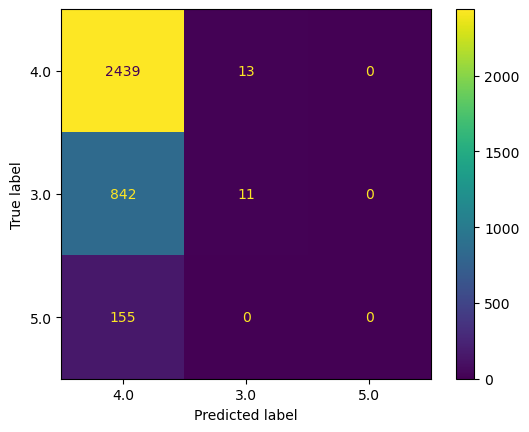

              precision    recall  f1-score   support

         3.0      0.458     0.013     0.025       853
         4.0      0.710     0.995     0.828      2452
         5.0      0.000     0.000     0.000       155

    accuracy                          0.708      3460
   macro avg      0.389     0.336     0.285      3460
weighted avg      0.616     0.708     0.593      3460



C:\Users\leoro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leoro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leoro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[2439,   13,    0],
       [ 842,   11,    0],
       [ 155,    0,    0]], dtype=int64)

In [24]:
confusion_matrix_plot(predictions, y_test.reset_index()['rating_label'])

In [54]:
######Formatting TEST DATA ########

dataT = pd.read_csv("project_data_files/book_rating_test.csv")

dataT.pop("Name")
dataT.pop("Description")
dataT.pop("Authors")


# Load in doc2vec features and add letter to start of name of value to make more identifiable
book_desc_featuresT = pd.read_csv(r"project_data_files/book_text_features_doc2vec/test_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_desc_featuresT, "d")

book_name_featuresT = pd.read_csv(r"project_data_files/book_text_features_doc2vec/test_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_name_featuresT, "n")

book_authors_featuresT = pd.read_csv(r"project_data_files/book_text_features_doc2vec/test_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
add_letter_to_cols(book_authors_featuresT, "a")

#learning Languages
langs = learnLanguage("project_data_files/book_rating_test.csv", "project_data_files/book_text_features_doc2vec/test_desc_doc2vec100.csv")
dataT['Language'] = langs

# Numericise language and publisher features
dataT['Language'] = (dataT['Language'] == 'eng').astype(int)
numericise_categorical_data(dataT, 'Publisher')

# Combine all gathered features into one dataframe
combinedT_df = pd.concat([dataT, book_name_featuresT, book_desc_featuresT, book_authors_featuresT], axis=1)

# Perform label encoding for publishers, language
label_encoder = LabelEncoder()
combinedT_df['Publisher'] = label_encoder.fit_transform(combinedT_df['Publisher'])
combinedT_df['Language'] = label_encoder.fit_transform(combinedT_df['Language'])

print(combinedT_df)
print(X)

rf = RandomForestClassifier(n_estimators=100, max_samples=0.7)
rf.fit(X, y)
predictions = rf.predict(combinedT_df)

      PublishYear  PublishMonth  PublishDay  Publisher  Language  pagesNumber  \
0            1993             1           1       1262         1          118   
1            1997             3          17       1421         1           32   
2            2005             1           1        194         1          544   
3            2006             9           5       1594         1          432   
4            2002             5           3       1760         1          352   
...           ...           ...         ...        ...       ...          ...   
5761         2003             9           1       1732         1          274   
5762         2004             9          10        566         1          224   
5763         1999            12          14        553         1          224   
5764         1972             6          21       1955         1          242   
5765         1994             9           1        399         1          192   

            n0        n1   

In [55]:
###GENERATING PREDICTIONS######

predictions = pd.Series(predictions, name = 'rating_label')
print(predictions)

predictions.to_csv("RFCPred.csv",index_label = 'id', index = True, na_rep='NULL')

df = pd.read_csv("RFCPred.csv")
df['id'] = df['id'] + 1
df.to_csv("RFCPred.csv", index = False, na_rep='NULL')

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
5761    4.0
5762    4.0
5763    4.0
5764    4.0
5765    4.0
Name: rating_label, Length: 5766, dtype: float64


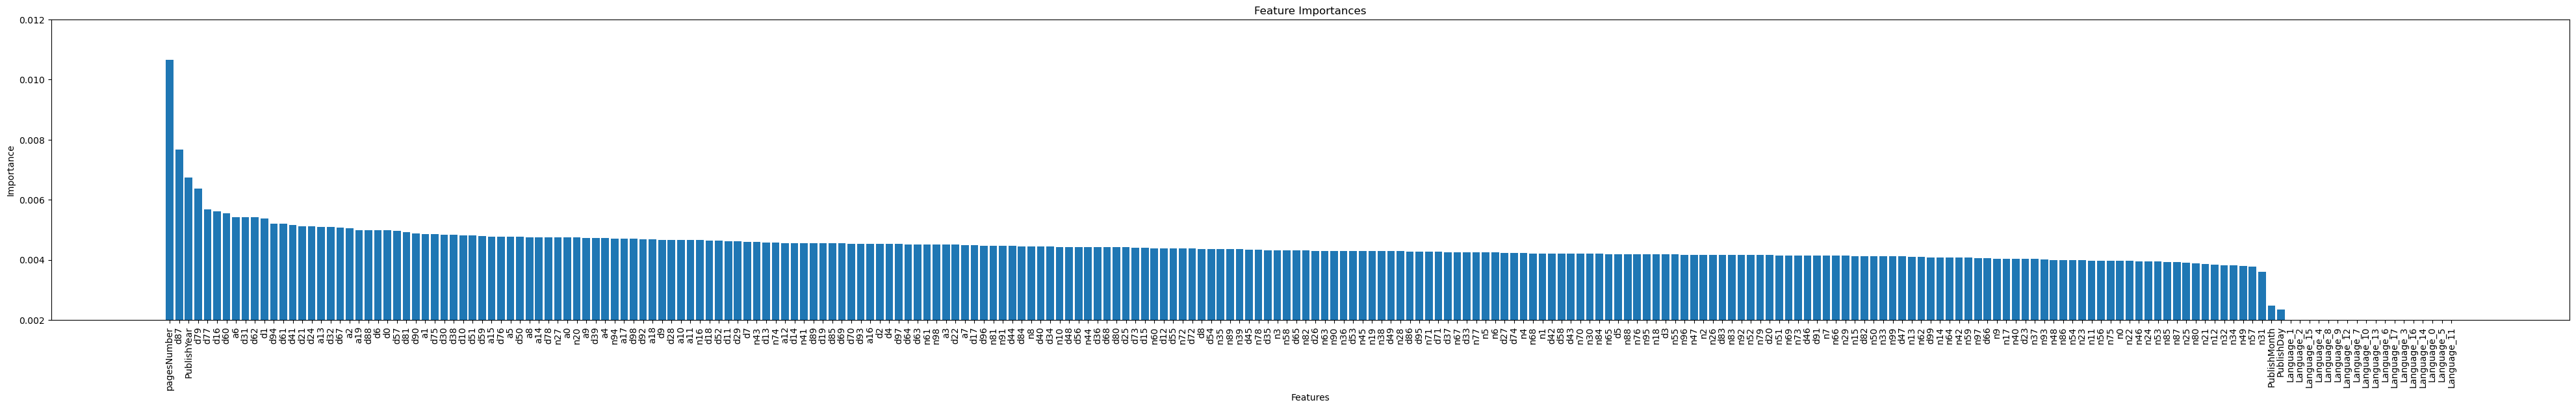

In [131]:
feature_importances = rf.feature_importances_

# Assuming you have trained a random forest model 'rf' and have a pandas DataFrame 'df'
feature_importances = rf.feature_importances_
feature_names = X_train.columns.tolist()

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(50, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.ylim(0.002, 0.012)
plt.show()

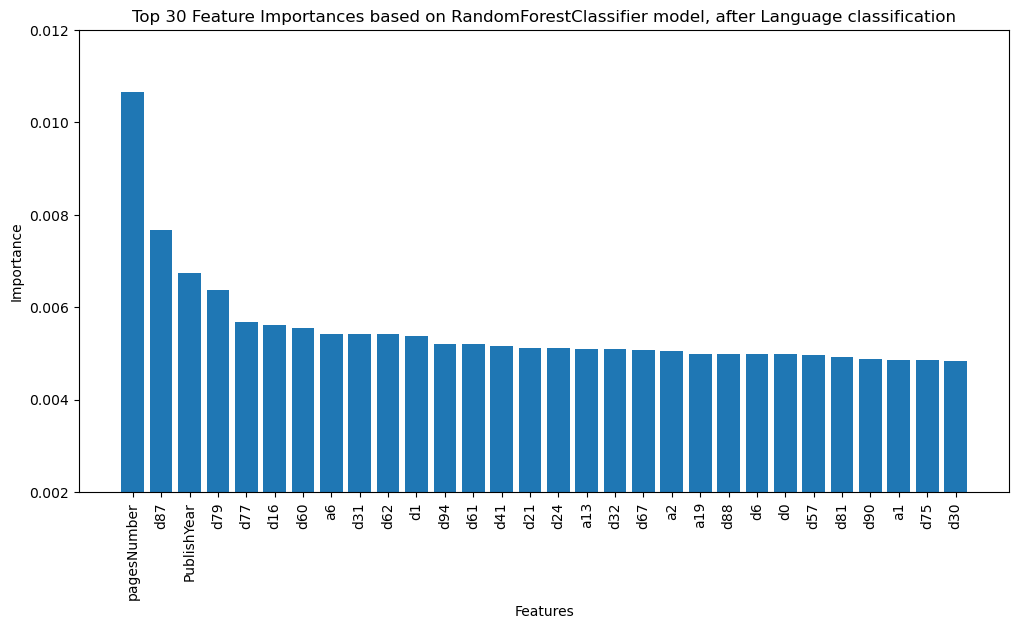

In [196]:
# Select only the top 20 features
top_feature_importances = sorted_feature_importances[:30]
top_feature_names = sorted_feature_names[:30]

# Plot the feature importances for the top 20 features
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_feature_importances)), top_feature_importances)
plt.xticks(range(len(top_feature_importances)), top_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 30 Feature Importances based on RandomForestClassifier model, after Language classification')

plt.ylim(0.002, 0.012)
plt.show()

In [176]:
# Load your dataset into a pandas DataFrame

# Select the continuous features you want to discretize (everything except for language, publisher and rating_label features)
continuous_features = [col for col in X.columns if col.startswith('n') or col.startswith('a') or col.startswith('d') or not col.startswith('Language') or not col.startswith('Publisher')]
continuous_features = continuous_features.drop('rating_label', axis=1).columns

# Discretize the continuous features using equal width binning
n_bins = 5  # Number of bins
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
discretized_data = discretizer.fit_transform(combined_df[continuous_features])

# Create a new DataFrame with discretized features
df_discretized = pd.DataFrame(discretized_data, columns=continuous_features)

# Perform feature selection using mutual information
target_variable = 'rating_label'  # Your target variable
X = df_discretized  # Features
y = combined_df[target_variable]  # Target variable

selector = SelectKBest(score_func=mutual_info_classif, k='all')
selected_features = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [X.columns[idx] for idx in selected_feature_indices]
selected_feature_scores = selector.scores_[selected_feature_indices]

# Sort features by score in descending order
sorted_features = sorted(zip(selected_feature_names, selected_feature_scores),
                         key=lambda x: x[1], reverse=True)

# Print the selected feature names and their mutual information scores in order
#print("Selected Features and Mutual Information Scores (in descending order):")
#for feature, score in sorted_features:
#    print(f"{feature}: {score}")


AttributeError: 'list' object has no attribute 'drop'

In [139]:
# Calculate averages for each letter-group
averages = {}
for feature, score in sorted_features:
    letter_group = feature[0]  # Get the first character of the feature name
    if letter_group in ["n","d","a", "L"]:
        if letter_group not in averages:
            averages[letter_group] = []
        averages[letter_group].append(score)

# Compute the average for each letter-group
for letter_group, scores in averages.items():
    average_score = sum(scores) / len(scores)
    print(f"Average score for {letter_group}-features: {average_score}")

Average score for d-features: 0.0030883479353575162
Average score for n-features: 0.0025730543192252586
Average score for a-features: 0.0013800498333301214
Average score for L-features: 0.0008116686544070347


1


C:\Users\leoro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5


C:\Users\leoro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


9


C:\Users\leoro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


13


C:\Users\leoro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


17


C:\Users\leoro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191


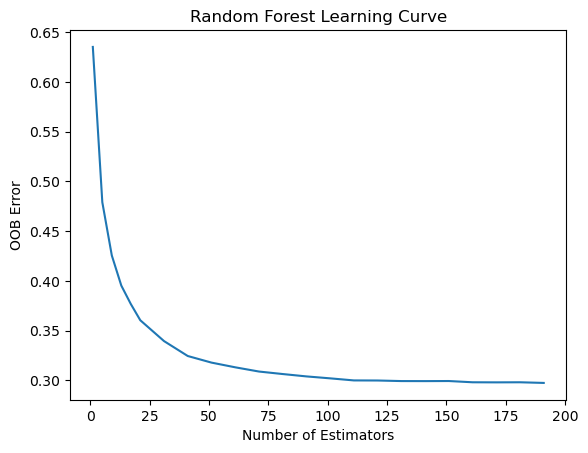

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define a range of n_estimators values to try
n_estimators_range = [x for x in range(1, 21) if (x-1)%4 == 0] + [x for x in range(21, 200) if (x-1)%10 == 0]

# Initialize lists to store OOB errors and n_estimators values
oob_errors = []
n_estimators_values = []

# Iterate over the n_estimators range
for n_estimators in n_estimators_range:
    print(n_estimators)
    clf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42)
    clf.fit(X, y)
    oob_error = 1 - clf.oob_score_
    
    oob_errors.append(oob_error)
    n_estimators_values.append(n_estimators)

# Plot the learning curve
plt.plot(n_estimators_values, oob_errors)
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Error')
plt.title('Random Forest Learning Curve')
plt.show()


0.1 loading....
Done
0.3 loading....
Done
0.5 loading....
Done
0.7 loading....
Done
0.9 loading....
Done


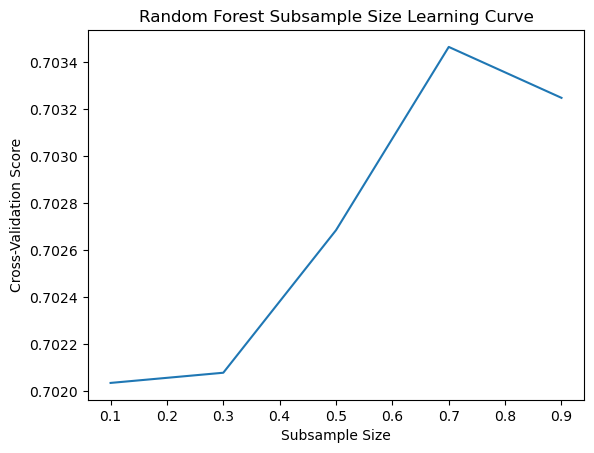

In [198]:
from sklearn.datasets import make_classification

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Define a range of subsample sizes to try
subsample_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialize lists to store cross-validation scores and subsample sizes
cv_scores = []
subsample_sizes_values = []

# Iterate over the subsample sizes
for subsample_size in subsample_sizes:
    print(subsample_size, "loading....")
    clf = RandomForestClassifier(n_estimators=100, max_samples=subsample_size, random_state=42)
    scores = cross_val_score(clf, X, y, cv=5)
    mean_score = np.mean(scores)
    
    cv_scores.append(mean_score)
    subsample_sizes_values.append(subsample_size)
    print("Done")

# Plot the learning curve
plt.plot(subsample_sizes_values, cv_scores)
plt.xlabel('Subsample Size')
plt.ylabel('Cross-Validation Score')
plt.title('Random Forest Subsample Size Learning Curve')
plt.show()
